In [1]:
# Importing Libraries
import pandas as pd
import mplsoccer as mps
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import add_image
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from adjustText import adjust_text
import matplotlib.patheffects as path_effects
from statsbombpy import sb
from PIL import Image
from matplotlib.colors import to_rgba

from mplsoccer import Pitch, FontManager, Sbopen

In [2]:
pd.set_option("display.max_columns",350)
pd.set_option("display.max_rows",1000)

In [3]:
# This shows all the competitions statsbomb data is available for
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-12-01T11:42:34.874323,2021-06-13T16:17:31.694,None,2022-12-01T11:42:34.874323
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [4]:
# Say We want pass networks for WC 2022, write the competition id & season id inside the bracket
schedule=sb.matches(43,106)

In [5]:
# Get the id for all matches
matchids=schedule["match_id"].unique().tolist()

In [6]:
# creating pandas dataframe to store data
wc22=pd.DataFrame()

In [7]:
# parser to get data
parser = Sbopen()

In [8]:
# getting data with a loop using all match ids
for i in range(len(matchids)):
    if(i==0):
        events, related, freeze, players = parser.event(matchids[0])
        wc22=events
    events, related, freeze, players = parser.event(matchids[i])    
    wc22=pd.concat([wc22,events],ignore_index=False)

In [9]:
# Merging schedule with this data so that we have match details & events
wc22=pd.merge(wc22,schedule,how="left",on=["match_id"])

In [10]:
# These are all the events that are recorded in the data
wc22["type_name"].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Duel', 'Pressure', 'Miscontrol', 'Shield', 'Ball Recovery',
       'Clearance', 'Dribble', 'Block', 'Shot', 'Goal Keeper',
       'Foul Committed', 'Foul Won', 'Interception', 'Dribbled Past',
       'Dispossessed', 'Player Off', 'Player On', 'Half End',
       'Substitution', 'Tactical Shift', '50/50', 'Injury Stoppage',
       'Referee Ball-Drop', 'Error', 'Offside', 'Bad Behaviour',
       'Own Goal For', 'Own Goal Against'], dtype=object)

In [11]:
# Your World Cup 2022 Data is ready with all starting & end locations!!
wc22

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,outcome_id,outcome_name,under_pressure,aerial_won,counterpress,pass_switch,out,off_camera,technique_id,technique_name,ball_recovery_recovery_failure,block_offensive,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_key_pass_id,goalkeeper_position_id,goalkeeper_position_name,pass_cross,foul_won_defensive,foul_committed_advantage,foul_won_advantage,pass_goal_assist,end_z,pass_cut_back,shot_first_time,foul_committed_card_id,foul_committed_card_name,substitution_replacement_id,substitution_replacement_name,shot_open_goal,shot_one_on_one,dribble_nutmeg,block_deflection,pass_no_touch,pass_miscommunication,dribble_overrun,pass_deflected,foul_committed_offensive,injury_stoppage_in_chain,foul_committed_penalty,foul_won_penalty,ball_recovery_offensive,bad_behaviour_card_id,bad_behaviour_card_name,block_save_block,dribble_no_touch,shot_deflected,half_start_late_video_start,shot_follows_dribble,shot_redirect,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,23767981-6cc9-402e-b257-5413c9445f06,1,1,00:00:00,0,0,1,0.000000,3869254,35,Starting XI,780,Portugal,1,Regular Play,780,Portugal,433.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-06,21:00:00.000,International - FIFA World Cup,2022,Portugal,Switzerland,6,1,available,available,2023-01-13T17:25:21.619928,2023-01-14T15:08:46.172894,4,Round of 16,Lusail Stadium,César Arturo Ramos Palazuelos,Fernando Manuel Fernandes da Costa Santos,Murat Yakin,1.1.0,2,2
1,d89914d9-3ae7-4f0e-b663-8e9bfa10ce08,2,1,00:00:00,0,0,1,0.000000,3869254,35,Starting XI,780,Portugal,1,Regular Play,773,Switzerland,352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-06,21:00:00.000,International - FIFA World Cup,2022,Portugal,Switzerland,6,1,available,available,2023-01-13T17:25:21.619928,2023-01-14T15:08:46.172894,4,Round of 16,Lusail Stadium,César Arturo Ramos Palazuelos,Fernando Manuel Fernandes da Costa Santos,Murat Yakin,1.1.0,2,2
2,b05f8f43-2d8f-4774-9c92-8f767e261a96,3,1,00:00:00,0,0,1,0.000000,3869254,18,Half Start,780,Portugal,1,Regular Play,773,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-06,21:00:00.000,International - FIFA World Cup,2022,Portugal,Switzerland,6,1,available,available,2023-01-13T17:25:21.619928,2023-01-14T15:08:46.172894,4,Round of 16,Lusail Stadium,César Arturo Ramos Palazuelos,Fernando Manuel Fernandes da Costa Santos,Murat Yakin,1.1.0,2,2
3,a3c7c779-1ca6-45e0-90d6-b1cc49a29d7a,4,1,00:00:00,0,0,1,0.000000,3869254,18,Half Start,780,Portugal,1,Regular Play,780,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [13]:
# Say we want to create some Viz like Pass Network for Netherlands in WC22, so we get the passes & ball carries
passes=wc22[wc22["type_name"]=="Pass"]
carries=wc22[wc22["type_name"]=="Carry"]

In [14]:
# Getting all Netherlands Matches
Ned_matches=passes[(passes["home_team"]=="Netherlands")|(passes["away_team"]=="Netherlands")].groupby(["home_team","away_team","match_date","match_id"]).agg({"home_score":"unique","away_score":"unique"}).reset_index()

In [15]:
# Getting match date in date format & sort it in ascending order wrt date
Ned_matches["match_date"]=pd.to_datetime(Ned_matches["match_date"])
Ned_matches=Ned_matches.sort_values(by=["match_date"])
Ned_matches=Ned_matches.reset_index()

In [16]:
# Your Nedtherlands Matches
Ned_matches

,index,home_team,away_team,match_date,match_id,home_score,away_score
0,4,Senegal,Netherlands,2022-11-21,3857285,[0],[2]
1,1,Netherlands,Ecuador,2022-11-25,3857274,[1],[1]
2,2,Netherlands,Qatar,2022-11-29,3857294,[2],[0]
3,3,Netherlands,United States,2022-12-03,3869117,[3],[1]
4,0,Netherlands,Argentina,2022-12-09,3869321,[2],[2]


In [17]:
# Getting games for Netherlands
games=Ned_matches["match_id"].values.tolist()

In [20]:
# Getting Netherlands NT Logo
nedimg=Image.open(urlopen("https://upload.wikimedia.org/wikipedia/en/thumb/7/78/Netherlands_national_football_team_logo.svg/270px-Netherlands_national_football_team_logo.svg.png"))

<Axes:>

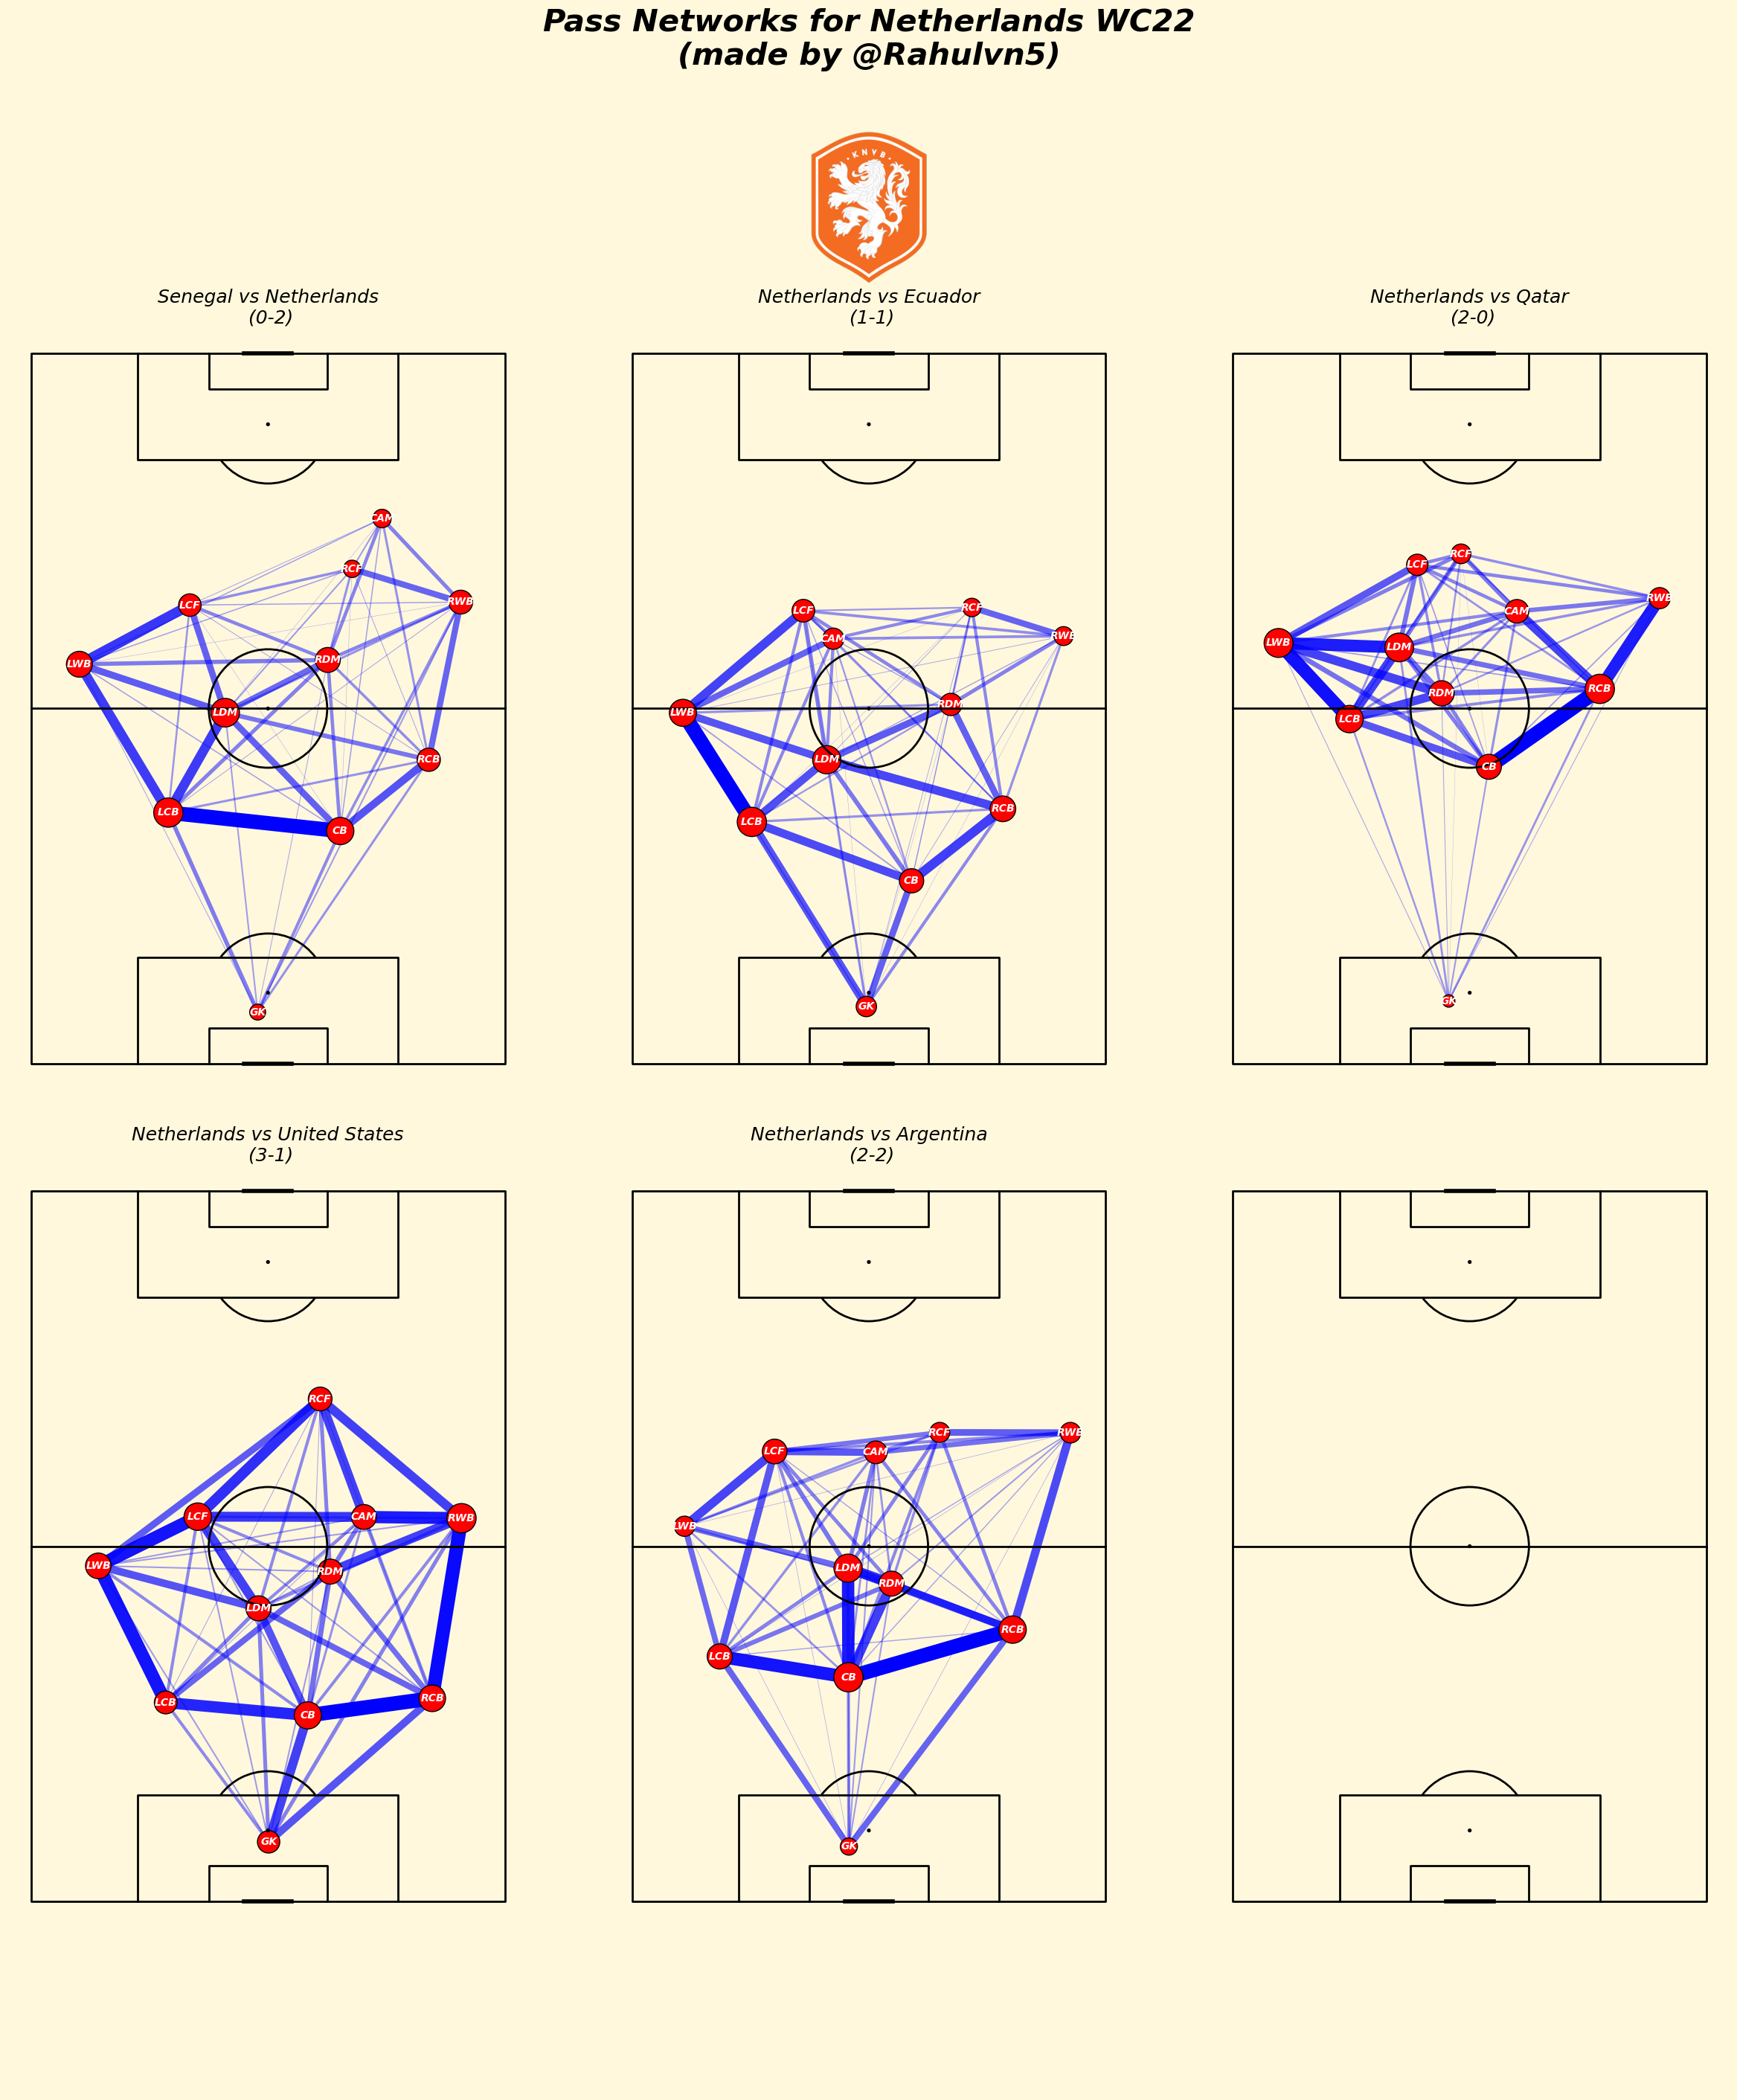

In [29]:
# This can be a huge chunk of code ;-( but just remember all we do in this code is just enter team name & rest of the stuff code takes
# takes care of itselves
pitch=mps.VerticalPitch(line_color="black",pitch_color="#FFF8DC",line_zorder=2)
fig,axs=pitch.grid(nrows=2,ncols=3,title_height=0.12,axis=False,grid_width=0.9,figheight=30)
fig.set_facecolor("#FFF8DC")
for idx,ax in enumerate(axs["pitch"].flat):
    if (idx==5):
        continue
    events, related, freeze, players = parser.event(games[idx])
    TEAM = 'Netherlands'
    events.loc[events.tactics_formation.notnull(), 'tactics_id'] = events.loc[
    events.tactics_formation.notnull(), 'id']
    events[['tactics_id', 'tactics_formation']] = events.groupby('team_name')[[
    'tactics_id', 'tactics_formation']].ffill()
    formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
    players['position_abbreviation'] = players.position_id.map(formation_dict)
    sub = events.loc[events.type_name == 'Substitution',
                 ['tactics_id', 'player_id', 'substitution_replacement_id',
                  'substitution_replacement_name']]
    players_sub = players.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')
    players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
                   .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
    players = pd.concat([players, players_sub])
    players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
    players = players[['tactics_id', 'player_id','position_abbreviation']]
    # add on the position the player was playing in the formation to the events dataframe
    events = events.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
    # add on the position the receipient was playing in the formation to the events dataframe
    events = events.merge(players.rename({'player_id': 'pass_recipient_id'},
                                         axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                          how='left', validate='m:1', suffixes=['', '_receipt'])
    df=pd.DataFrame(events.groupby('team_name').tactics_formation.unique()).reset_index()
    list1=df[df["team_name"]=="Netherlands"]["tactics_formation"].iloc[0].tolist()
    FORMATION = list1[0]
    pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
    passes_formation = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') &
                                  (events.tactics_formation == FORMATION) &
                                  (events.position_abbreviation_receipt.notnull()), pass_cols].copy()
    location_cols = ['position_abbreviation', 'x', 'y']
    location_formation = events.loc[(events.team_name == TEAM) &
                                    (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                    (events.tactics_formation == FORMATION), location_cols].copy()

    # average locations
    average_locs_and_count = (location_formation.groupby('position_abbreviation')
                              .agg({'x': ['mean'], 'y': ['mean', 'count']}))
    average_locs_and_count.columns = ['x', 'y', 'count']

    # calculate the number of passes between each position (using min/ max so we get passes both ways)
    passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                    'position_abbreviation_receipt']]
                                   .max(axis='columns'))
    passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                    'position_abbreviation_receipt']]
                                   .min(axis='columns'))
    passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
    passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    # add on the location of each player so we have the start and end positions of the lines
    passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
    passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                          suffixes=['', '_end'])
    MAX_LINE_WIDTH = 14
    MAX_MARKER_SIZE = 800
    passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                               MAX_LINE_WIDTH)
    average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                             / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)
    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('blue'))
    color = np.tile(color, (len(passes_between), 1))
    c_transparency = passes_between.pass_count / passes_between.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency
    pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
    ax.set_title(events["team_name"].unique().tolist()[0] + " vs " + events["team_name"].unique().tolist()[1] + "\n (" + str(Ned_matches["home_score"][idx].tolist()[0]) + "-" + str(Ned_matches["away_score"][idx].tolist()[0]) + ")" ,color="black",fontsize=18)
    for index, row in average_locs_and_count.iterrows():
        pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=10, weight='bold', ax=ax)
title = axs['title'].text(0.5, 1,'Pass Networks for Netherlands WC22\n(made by @Rahulvn5)',
                          ha='center', va='center', fontsize=30,color='black',weight="bold")           
add_image(nedimg,fig, left=0.4, bottom=0.85, width=0.2, height=0.07)